'''
v1: Scienceon, DBPIA, NTIS AuthorPapers 접근하여 Rawdata에서 필터링된 papers를 추가
v2: Answer 변경 및 f_id 수정 중
v3: time, tqdm 추가하여 속도 확인
v4: Scienceon, DBPIA에 mng로 검색 추가
v5: DBPIA 삭제하고 KCI 추가 & Rawdata 먼저 접급으로 변경, answer check 추가
'''

In [22]:
from sklearn.cluster import KMeans

In [27]:
import matplotlib.pyplot as plt

In [28]:
xlsData = pd.read_excel("C:/workSpace(expert)/PM10.xlsx")

In [29]:
samples = xlsData[['Temp', 'Wind Speed','Humidity', 'PM10']]
print(samples)

       Temp  Wind Speed  Humidity  PM10
0      -0.8         0.7      78.0   104
1      -1.8         0.3      85.0   102
2      -2.0         0.1      88.0    92
3      -2.6         0.6      90.0   102
4      -3.0         0.3      92.0    94
...     ...         ...       ...   ...
16155   1.0         1.0      39.0    24
16156   0.5         1.2      45.0    40
16157   0.1         0.5      51.0    46
16158   0.1         0.8      53.0    54
16159  -0.3         0.6      54.0    62

[16160 rows x 4 columns]


In [50]:
model = KMeans(n_clusters = 3)
model.fit(samples)
labels = model.predict(samples)

In [51]:
x = samples.iloc[:, 0]
y = samples.iloc[:, 2]

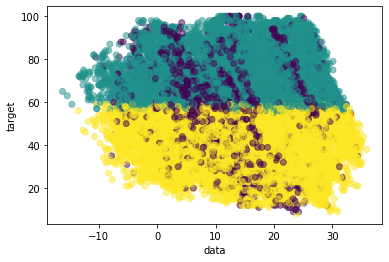

In [52]:
plt.scatter(x, y, c=labels, alpha=0.5)
plt.xlabel('data')
plt.ylabel('target')
plt.show()

In [53]:
target = xlsData['PM10_LEVEL']
target

0        2
1        2
2        2
3        2
4        2
        ..
16155    0
16156    1
16157    1
16158    1
16159    1
Name: PM10_LEVEL, Length: 16160, dtype: int64

In [54]:
import numpy as np

species = np.chararray(target.shape, itemsize=150)
for i in range(len(samples)):
  if target[i] == 0:
    species[i] = 'Good'
  elif target[i] == 1:
    species[i] = 'Normal'
  elif target[i] == 2:
    species[i] = 'Bad'
  elif target[i] == 3:
    species[i] = 'Very Bad'

In [55]:
import pandas as pd

df = pd.DataFrame({'labels': labels, 'species': species})
ct = pd.crosstab(df['labels'], df['species'])
print(ct)

species  b'Bad'  b'Good'  b'Normal'  b'Very Bad'
labels                                          
0          3053        0         33          325
1           114     1331       4690            0
2           204     1037       5373            0


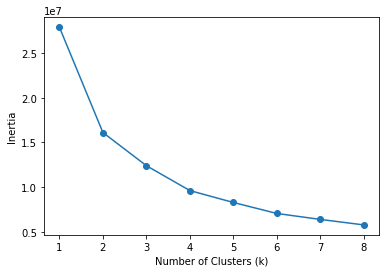

In [56]:
num_clusters = list(range(1, 9))	# K는 1 ~ 8사이의 정수입니다
inertias = []
# 각 K별로 모델을 생성하여 inertia를 측정합니다
for i in num_clusters:
    model = KMeans(n_clusters=i)
    model.fit(samples)
    inertias.append(model.inertia_)
# K에 따른 inertia의 변화를 시각화합니다
plt.plot(num_clusters, inertias, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()